# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import tensorflow as tf
from tensorflow import keras
import os

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [2]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [3]:
def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [4]:
# look into training history
def PlotHistory(y_acc,v_acc,y_loss,v_loss,opt):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
    font = FontProperties()

    # summarize history for accuracy
    ax0.plot(y_acc)
    ax0.plot(v_acc)
    ax0.set_ylabel('model accuracy')
    ax0.set_xlabel('epoch')
    ax0.set_title('Optimizer: '+opt,color='C0',fontsize=15)
    ax0.legend(['train', 'test'], loc='best')

    # summarize history for loss
    ax1.plot(y_loss)
    ax1.plot(v_loss)
    ax1.set_ylabel('model loss')
    ax1.set_xlabel('epoch')
    ax1.set_title('Optimizer: '+opt,color='C0',fontsize=15)
    ax1.legend(['train', 'test'], loc='best')
    
    plt.show()

In [5]:
# training parameters
batch_size = 32
epochs = 5

# input/output image dimensions
img_rows, img_cols = 28, 28    # pixels 
num_classes = 10               # 10 digits

<br>

### **Optimizer:** Adam

#### Step 1: Load and Process the Data

In [6]:
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


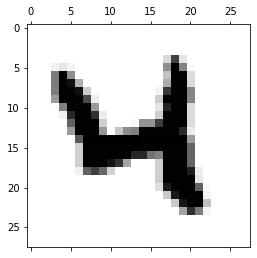

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [7]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

<br>

#### Steps 2, 3, 4: Defining the NN and its Architecture, Choosing Optimizer and Cost Function, Training the model

In [8]:
# create the deep neural net
model_DNN = compile_model(Adam())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

#### Step 5: Evaluating the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 0s 626us/step - loss: 0.0749 - accuracy: 0.9783

Test loss: 0.07490579783916473
Test accuracy: 0.9782999753952026



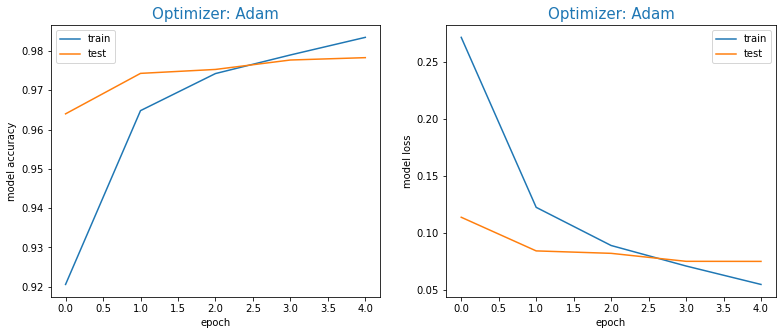

In [9]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1]); print()

PlotHistory(history.history['accuracy'],history.history['val_accuracy'],history.history['loss'],history.history['val_loss'],'Adam')

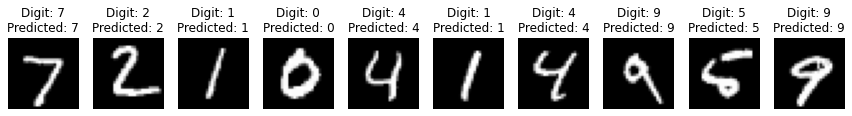

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<br>

### **Optimizer:** RMSprop

#### Step 1: Load and Process the Data

In [11]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#### Steps 2, 3, 4: Defining the NN and its Architecture, Choosing Optimizer and Cost Function, Training the model

In [12]:
# create the deep neural net
model_DNN = compile_model(RMSprop())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

#### Step 5: Evaluating the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 0s 637us/step - loss: 0.1873 - accuracy: 0.9732

Test loss: 0.18731778860092163
Test accuracy: 0.9732000231742859


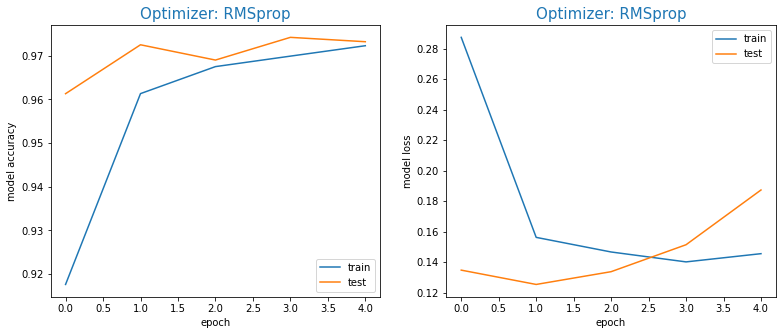

In [13]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

PlotHistory(history.history['accuracy'],history.history['val_accuracy'],history.history['loss'],history.history['val_loss'],'RMSprop')

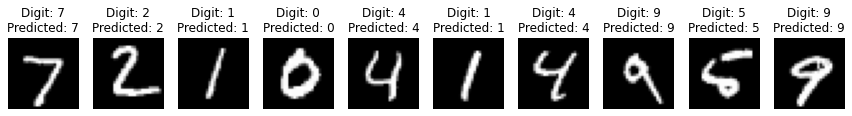

In [14]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<br>

### **Optimizer:** SGD

#### Step 1: Load and Process the Data

In [15]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#### Steps 2, 3, 4: Defining the NN and its Architecture, Choosing Optimizer and Cost Function, Training the model

In [16]:
# create the deep neural net
model_DNN = compile_model(SGD())

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

313/313 [==============================] - 0s 627us/step - loss: 0.1577 - accuracy: 0.9531

Test loss: 0.1576814204454422
Test accuracy: 0.9531000256538391


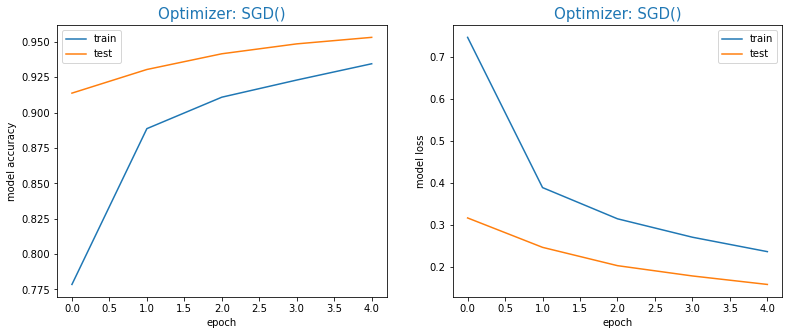

In [17]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

PlotHistory(history.history['accuracy'],history.history['val_accuracy'],history.history['loss'],history.history['val_loss'],'SGD()')

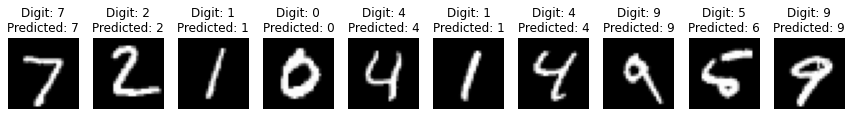

In [18]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<br><br>
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5"> 
    Ho utilizzato tre ottimizzatori diversi: <b>Adam</b>, <b>RMSprop</b> e <b>SGD</b>. <br>
    Come si può notare dai grafici della loss, il migliore tra i tre risulta essere lo SGD: le loss dei dati di test degli altri due anzichè decrescere crescono.
    </p>
<br>

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

#### <b>Convolutional Neural Network</b>: Loading and Processing the Data

In [19]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [20]:
def create_CNN():
    
    # instantiate model
    model = Sequential()
    
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    
    # add second convolutional layer with 62 filters
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=input_shape))
    
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    
    # add 2D pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # flatten data
    model.add(Flatten())
    
    #add last but one layer          
    model.add(Dense(256, activation='relu'))
    
    # add a dense all-to-all softmax layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
    return model

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7244 - accuracy: 0.7592 - val_loss: 0.2741 - val_accuracy: 0.9472
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2865 - accuracy: 0.9109 - val_loss: 0.1791 - val_accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2260 - accuracy: 0.9281 - val_loss: 0.1440 - val_accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1920 - accuracy: 0.9388 - val_loss: 0.1222 - val_accuracy: 0.9738
Epoch 5/5
313/313 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9774

Test loss: 0.10997137427330017
Test accuracy: 0.977400004863739


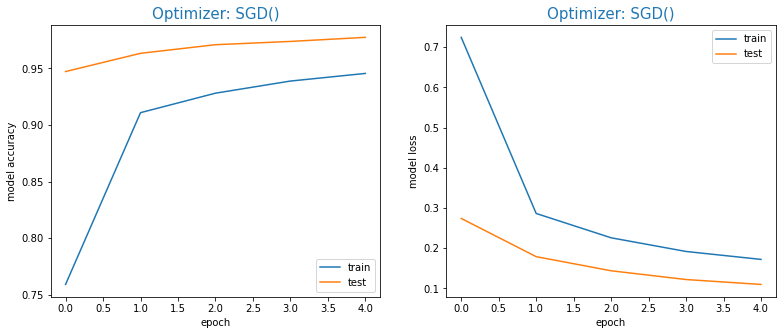

In [21]:
# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

PlotHistory(history.history['accuracy'],history.history['val_accuracy'],history.history['loss'],history.history['val_loss'],'SGD()')

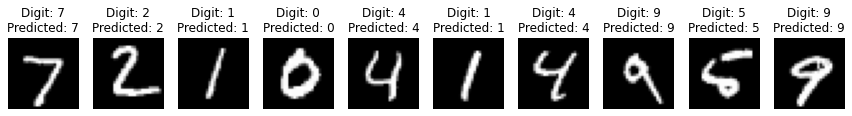

In [22]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<br>

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

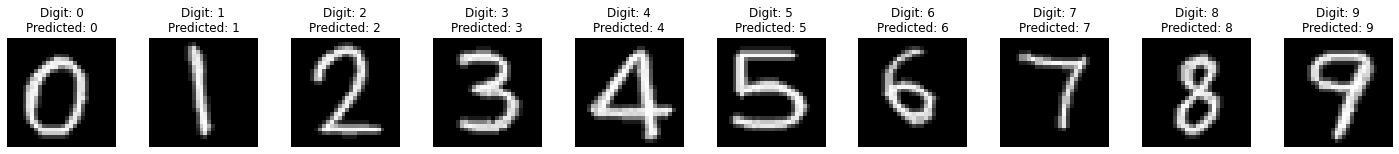

In [27]:
from PIL import Image
import os

plt.figure(figsize=(25,2))

for digit in range(10):

    digit_filename = "Lecture12/Digits/"+str(digit)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    plt.subplot(1, 10, digit+1)
    
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1, xdim*ydim)
    
    # reshape data, depending on Keras backend
    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        
    pred_0 = model_CNN.predict(data)
    
    plt.title("Digit: {}\nPredicted: {}".format(digit, np.argmax(pred_0)))
    plt.axis('off')
plt.show()